<a href="https://colab.research.google.com/github/MaratElagin/ITIS.DataMining/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
#подключаем необходимые библиотеки
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from sklearn.cluster import KMeans
from google.colab import drive #для датасета с google drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [194]:


dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/wb_teapot.xlsx')
dataset = dataset.dropna() #удаляем строки с незаполненными данными
dataset.head()

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Длина кабеля,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june
0,2171393,35,4,4193,16012,Philips,Чайник Avance Collection HD9340/90 со стеклянн...,0,https://www.wildberries.ru/catalog/2171393/det...,0,...,75.0,1,нержавеющая сталь; стекло,HD9340/90,2200.0,1.5,Нидерланды,Китай,"прозрачный, черный",0
2,2389982,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389982/det...,0,...,75.0,1,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,черный,200
3,2389983,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389983/det...,0,...,75.0,1,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,"белый, красный",100
4,2389984,273,4,1883,16012,Philips,Чайник Daily Collection HD4646,0,https://www.wildberries.ru/catalog/2389984/det...,0,...,75.0,1,пластик,HD4646,2400.0,1.5,Нидерланды,Польша,"голубой, белый",200
6,2508310,48,5,2323,17158,Tefal,Чайник Tefal Express Plastic KO29913E,0,https://www.wildberries.ru/catalog/2508310/det...,0,...,80.0,1,пластик,KO29913E,2200.0,1.5,Франция,Китай,белый,100


Рассмотрим и рассчитаем статистические параметры для столбцов:
 

*   Review - количество отзывов на чайник (среднее 37, наиболее вероятное: 10)
*   Star - количество звёзд у товара (среднее 3.74, , наиболее вероятное: 4)
*   OrdersCount - количество заказов (среднее 298, , наиболее вероятное: 90)



In [195]:
col = ['Review', 'Star', 'ordersCount']
X=dataset[col]
X.describe()

,Review,Star,ordersCount
count,306.000000,306.000000,306.000000
mean,37.307190,3.735294,298.267974
std,75.221054,0.991040,806.045970
min,0.000000,0.000000,20.000000
25%,4.250000,3.000000,30.000000
50%,10.000000,4.000000,90.000000
75%,31.750000,4.000000,275.000000
max,535.000000,5.000000,10300.000000


Рассчитаем корреляцию между данными. Ревью хорошо коррелирует с количеством заказов. Других сильных зависимостей между данными нет.

In [196]:
X.corr()

,Review,Star,ordersCount
Review,1.000000,0.265687,0.720904
Star,0.265687,1.000000,0.180962
ordersCount,0.720904,0.180962,1.000000


Нормируем данные, потому что продажи и отзывы измеряются тысячами, а звёзды от 0 до 5.
После нормализации все значения будут в диапазоне от 0 до 1

In [197]:
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(X)

Метод локтя, чтобы определить оптимальное колечество кластеров

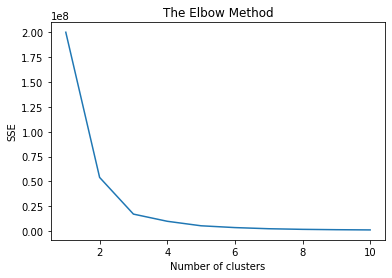

In [198]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Из графика видно, что при переходе с 5 кластеров на 6 SSE (сумма ошибок) уменьшается не так сильно. Поэтому возьмём количество кластеров k = 5.

In [199]:
k = 5

Строим кластеризацию с помощью KMeans. Пункт точки останова - 300 итераций

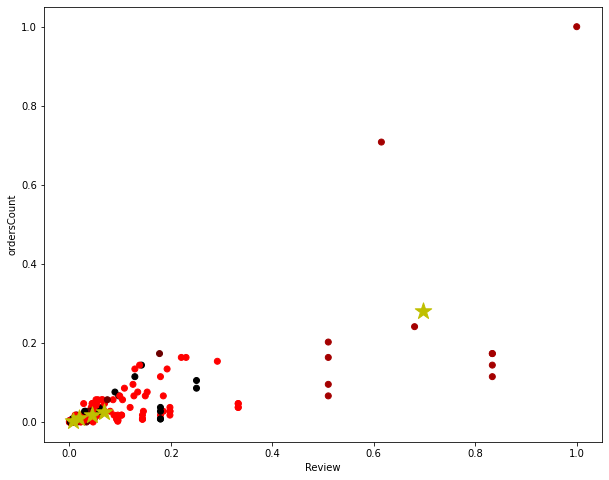

In [200]:
km = KMeans(n_clusters=k, max_iter=300).fit(dataNorm)
x=0
y=2
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='y', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);

plt.show()

Выводим сводку получившихся кластеров

In [201]:
# к оригинальным данным добавляем номера кластеров
dataset['KMeans']=km.labels_+1
res=dataset.groupby('KMeans')[col].mean().sort_values('KMeans')
res['Количество']=dataset.groupby('KMeans').size().values
res

,Review,Star,ordersCount,Количество
KMeans,,,,
1,36.013793,4.000000,271.103448,145
2,3.666667,1.566667,41.666667,30
3,373.090909,4.545455,2900.000000,11
4,10.582090,3.000000,112.835821,67
5,23.981132,5.000000,212.264151,53


Видим выбросы:
* 3-ий кластер (11 чайников), с огромным количеством отзывов и заказов, а также высоким рейтингом.
* 4-ый кластер (53 чайника) - с большим количеством заказов и высоким рейтингом.  



Рассмотрим 4-ый кластер крупным планом

In [202]:
dataset[dataset['KMeans']==3][['Review', 'Star', 'ordersCount', 'Value', 'brandName', 'goodsName', 'Модель', 'Объем чайника', 'Цвет']]

,Review,Star,ordersCount,Value,brandName,goodsName,Модель,Объем чайника,Цвет
2,273,4,2100,1883,Philips,Чайник Daily Collection HD4646,HD4646,1.5,черный
3,273,4,1000,1883,Philips,Чайник Daily Collection HD4646,HD4646,1.5,"белый, красный"
4,273,4,700,1883,Philips,Чайник Daily Collection HD4646,HD4646,1.5,"голубой, белый"
11,273,4,1700,1883,Philips,Чайник Daily Collection HD4646,HD4646,1.5,белый
23,329,4,7300,2195,REDMOND,Чайник RK-G178,RK-G178,1.7,"черный, прозрачный"
98,446,5,1200,1205,GALAXY,Чайник электрический GL0318,GL0318,1.7,"белый, серый"
99,446,5,1800,1205,GALAXY,Чайник электрический GL0318,GL0318,1.7,"салатовый, серый"
100,446,5,1800,1205,GALAXY,Чайник электрический GL0318,GL0318,1.7,"коричневый, серый"
101,446,5,1500,1205,GALAXY,Чайник электрический GL0318,GL0318,1.7,"красный, серый"
121,535,5,10300,2180,REDMOND,Электрический чайник RK-M177,RK-M177,1.7,серый


Вывод: у модели Redmond RK-M177 очень завышена оценка и количество заказов.